# 주식 데이터

# 1. 데이터 불러오기

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')
data_path = 'stock/005930.KS.csv'
df = pd.read_csv(data_path) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-28,83200.0,83200.0,82100.0,82100.0,80985.664063,15596759
1,2021-04-29,82400.0,82500.0,81500.0,81700.0,80591.093750,20000973
2,2021-04-30,81900.0,82100.0,81500.0,81500.0,80393.812500,18673197
3,2021-05-03,81000.0,82400.0,81000.0,81700.0,80591.093750,15710336
4,2021-05-04,81900.0,82600.0,81800.0,82600.0,81478.882813,12532550


In [27]:
ts1 = df['Open']  # 우선은 데이터 확인용이니 time series 의 이니셜을 따서 'ts'라고 이름 붙여줍시다!
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


0    83200.0
1    82400.0
2    81900.0
3    81000.0
4    81900.0
Name: Open, dtype: float64

Series([], Name: Open, dtype: float64)


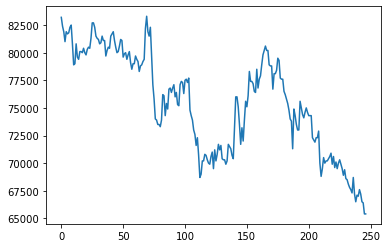

In [28]:
ts1=ts1.interpolate(method='time')
print(ts1[ts1.isna()])
plt.plot(ts1)

# 그래프 표시

In [29]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  
    rolstd = timeseries.rolling(window=window).std()    
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    


# p-value 값 확인

In [30]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')  
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [31]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                  -1.406602
p-value                          0.579107
#Lags Used                       0.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


# 2. 각종 전처리 수행하기 (결측치, 로그)

# 로그 변환

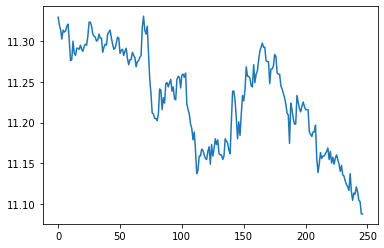

In [32]:
ts_log = np.log(ts1)
plt.plot(ts_log)

In [33]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.292234
p-value                          0.632718
#Lags Used                       0.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


# 이때 로그변환을 했음에도 p-value 값이 올라갔다. 그래서 결측치를 쓰기로 했다.

# 로그 변환 전에 결측치를 쓸 경우

In [34]:
moving_avg_1 = ts1.rolling(window=12).mean()

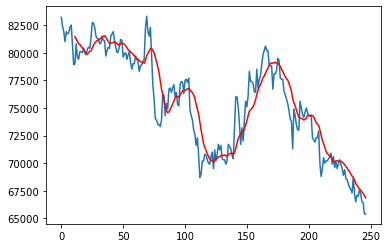

In [35]:
plt.plot(ts1)
plt.plot(moving_avg_1, color='red')

In [36]:
ts_log_moving_avg_1 = ts1 - moving_avg_1 
ts_log_moving_avg_1.head(15)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11   -2450.000000
12    -450.000000
13   -1416.666667
14   -1408.333333
Name: Open, dtype: float64

In [37]:
ts_log_moving_avg_1.dropna(inplace=True)
ts_log_moving_avg_1.head(15)

11   -2450.000000
12    -450.000000
13   -1416.666667
14   -1408.333333
15    -633.333333
16    -483.333333
17    -441.666667
18      75.000000
19    -133.333333
20    -108.333333
21     433.333333
22     500.000000
23     283.333333
24    1141.666667
25    2283.333333
Name: Open, dtype: float64

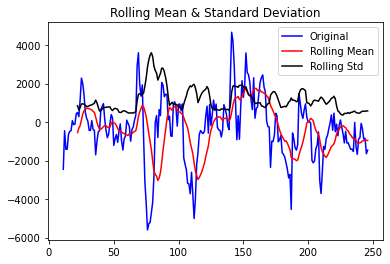

In [38]:
plot_rolling_statistics(ts_log_moving_avg_1)

In [39]:
augmented_dickey_fuller_test(ts_log_moving_avg_1)

Results of Dickey-Fuller Test:
Test Statistic                  -4.722564
p-value                          0.000076
#Lags Used                       0.000000
Number of Observations Used    235.000000
Critical Value (1%)             -3.458487
Critical Value (5%)             -2.873919
Critical Value (10%)            -2.573367
dtype: float64


# 로그 변환 후 할 경우

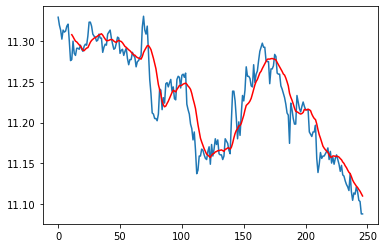

In [40]:
moving_avg = ts_log.rolling(window=12).mean()  
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [41]:
ts_log_moving_avg = ts_log - moving_avg 
ts_log_moving_avg.head(15)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11   -0.030418
12   -0.005449
13   -0.017531
14   -0.017464
Name: Open, dtype: float64

In [42]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

11   -0.030418
12   -0.005449
13   -0.017531
14   -0.017464
15   -0.007755
16   -0.005903
17   -0.005400
18    0.001026
19   -0.001599
20   -0.001330
21    0.005434
22    0.006248
23    0.003541
24    0.014159
25    0.028049
Name: Open, dtype: float64

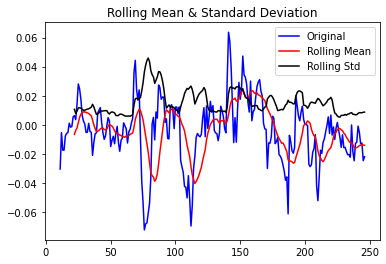

In [43]:
plot_rolling_statistics(ts_log_moving_avg)

In [44]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -4.730211
p-value                          0.000074
#Lags Used                       0.000000
Number of Observations Used    235.000000
Critical Value (1%)             -3.458487
Critical Value (5%)             -2.873919
Critical Value (10%)            -2.573367
dtype: float64


# 로그 변환 후 변화량 제거를 할 결우 p-value 값이 더 낮아졌다.

# 3. 시계열 안전성 분석 

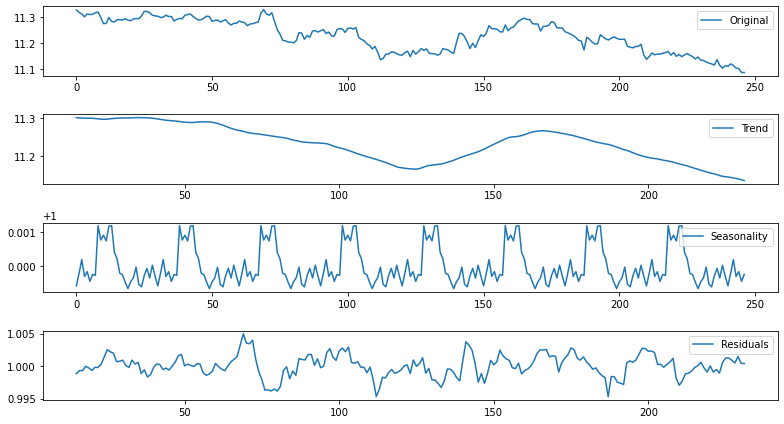

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm



decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [46]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.441227
p-value                          0.000003
#Lags Used                       5.000000
Number of Observations Used    211.000000
Critical Value (1%)             -3.461727
Critical Value (5%)             -2.875337
Critical Value (10%)            -2.574124
dtype: float64


# 4. 학습, 테스트 데이터셋 생성

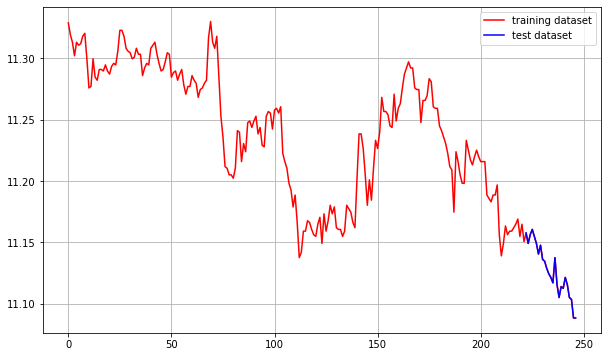

In [47]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset') 
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

# 5. 적정 ARIMA 모수 찾기

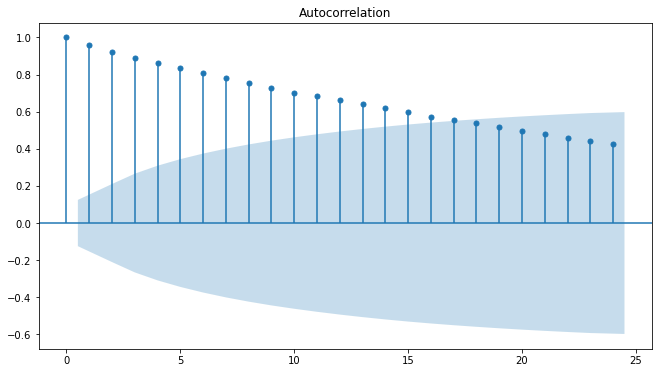

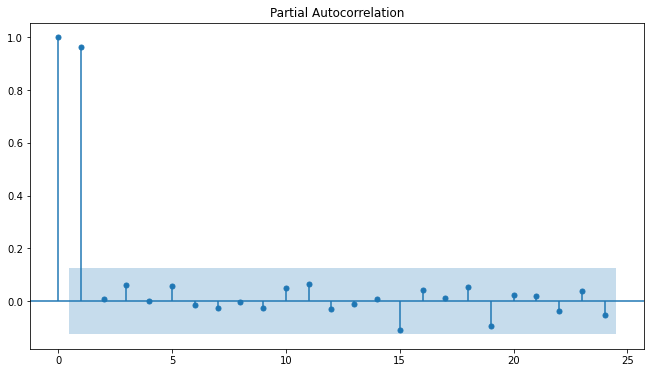

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   
plot_pacf(ts_log)  
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.603768e+01
p-value                        5.961291e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64


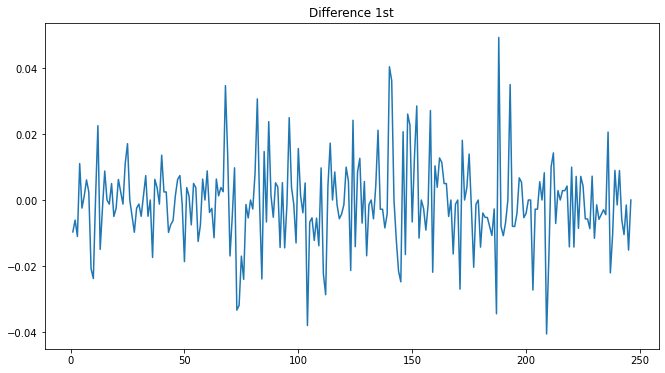

In [49]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.741160e+00
p-value                        3.006309e-14
#Lags Used                     1.200000e+01
Number of Observations Used    2.320000e+02
Critical Value (1%)           -3.458855e+00
Critical Value (5%)           -2.874080e+00
Critical Value (10%)          -2.573453e+00
dtype: float64


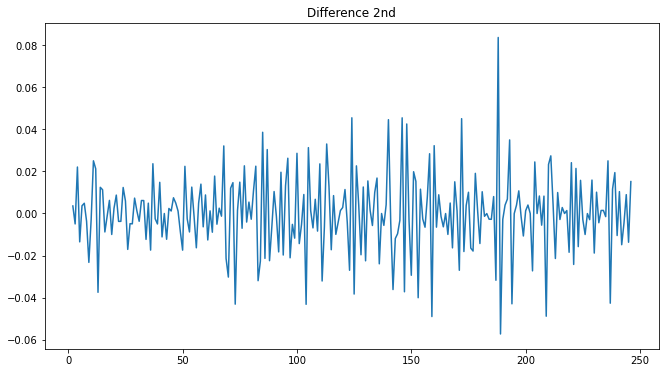

In [50]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

# 6. ARIMA 모델 훈련과 테스트

In [51]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  222
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 639.756
Date:                Wed, 04 May 2022   AIC                          -1271.512
Time:                        21:17:23   BIC                          -1257.902
Sample:                             0   HQIC                         -1266.017
                                - 222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2397      0.022    506.922      0.000      11.196      11.283
ar.L1          0.9683      0.018     54.758      0.000       0.934       1.003
ma.L1          0.0111      0.056      0.198      0.8

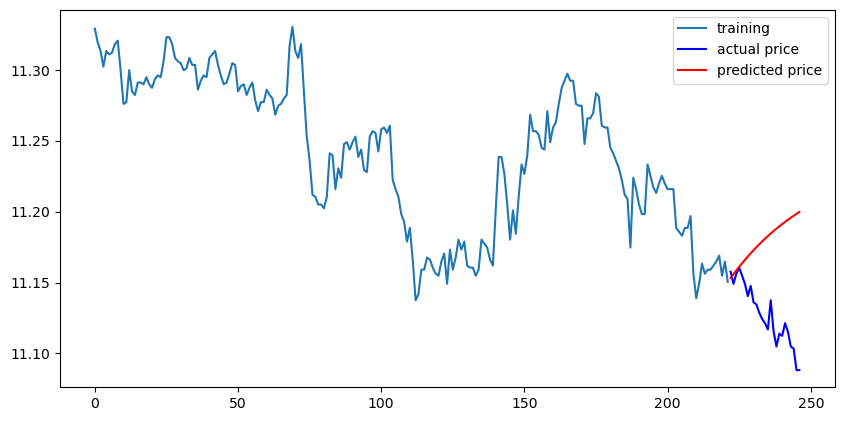

In [52]:
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  18759170.24661499
MAE:  3644.850607409086
RMSE:  4331.18577835389
MAPE: 5.43%


# 이 과정을 쉽게 반복하기 위해 함수로 묶어서 실행하겠습니다.

In [54]:
def stockpredict(sdf,p,q,d):
    #변환하기전 확인
    augmented_dickey_fuller_test(sdf)

    #로그변환
    sdf_log = np.log(sdf)
    plt.plot(sdf_log)

    #결측치, NaN 값 제거, 그래프, p-value값 확인
    smoving_avg = sdf_log.rolling(window=12).mean()  
    sdf_log_moving_avg = sdf_log - smoving_avg 
    sdf_log_moving_avg.dropna(inplace=True)
    plot_rolling_statistics(sdf_log_moving_avg)
    augmented_dickey_fuller_test(sdf_log_moving_avg)
    #시계열 안전성 분석
    decomposition = seasonal_decompose(sdf_log, model='multiplicative', period = 30) 

    trend = decomposition.trend 
    seasonal = decomposition.seasonal 
    residual = decomposition.resid 

    plt.rcParams["figure.figsize"] = (11,6)
    plt.subplot(411)
    plt.plot(ts_log, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    residual.dropna(inplace=True)
    augmented_dickey_fuller_test(residual)

    #학습 데이터 생성
    train_data, test_data = sdf_log[:int(len(sdf_log)*0.9)], sdf_log[int(len(sdf_log)*0.9):]

    #적정 아리마 모수 찾기
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

    plot_acf(sdf_log)   
    plot_pacf(sdf_log)  
    plt.show()

    #1,2차 미분
    # 1차 차분 구하기
    diff_1 = sdf_log.diff(periods=1).iloc[1:]
    diff_1.plot(title='Difference 1st')
    print(augmented_dickey_fuller_test(diff_1))
    # 2차 차분 구하기
    diff_2 = diff_1.diff(periods=1).iloc[1:]
    diff_2.plot(title='Difference 2nd')
    print(augmented_dickey_fuller_test(diff_2))

    model = ARIMA(train_data, order=(p, q, d))  
    fitted_m = model.fit() 
    print(fitted_m.summary())

    #결과 그래프 생성
    fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
    fc = np.array(fc)

    fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

    plt.figure(figsize=(10,5), dpi=100)
    plt.plot(train_data, label='training')
    plt.plot(test_data, c='b', label='actual price')
    plt.plot(fc_series, c='r',label='predicted price')
    plt.legend()
    plt.show()

    #mape 값
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import math

    mse = mean_squared_error(np.exp(test_data), np.exp(fc))
    print('MSE: ', mse)

    mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
    print('MAE: ', mae)

    rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
    print('RMSE: ', rmse)

    mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
    print('MAPE: {:.2f}%'.format(mape*100))
    

In [55]:
ts2 = df['Close']

Results of Dickey-Fuller Test:
Test Statistic                  -1.058618
p-value                          0.731289
#Lags Used                       0.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


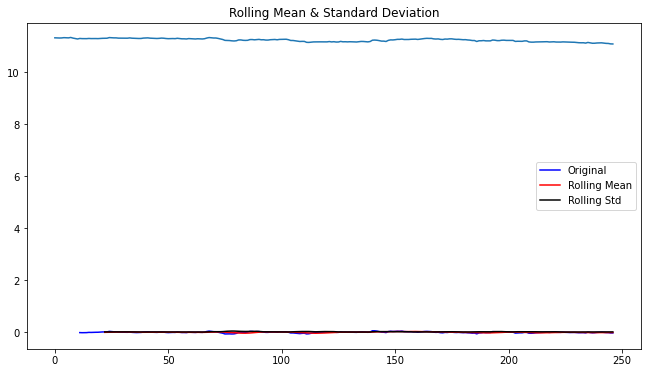

Results of Dickey-Fuller Test:
Test Statistic                  -4.808566
p-value                          0.000052
#Lags Used                       1.000000
Number of Observations Used    234.000000
Critical Value (1%)             -3.458608
Critical Value (5%)             -2.873972
Critical Value (10%)            -2.573396
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -5.557804
p-value                          0.000002
#Lags Used                       1.000000
Number of Observations Used    215.000000
Critical Value (1%)             -3.461136
Critical Value (5%)             -2.875079
Critical Value (10%)            -2.573986
dtype: float64


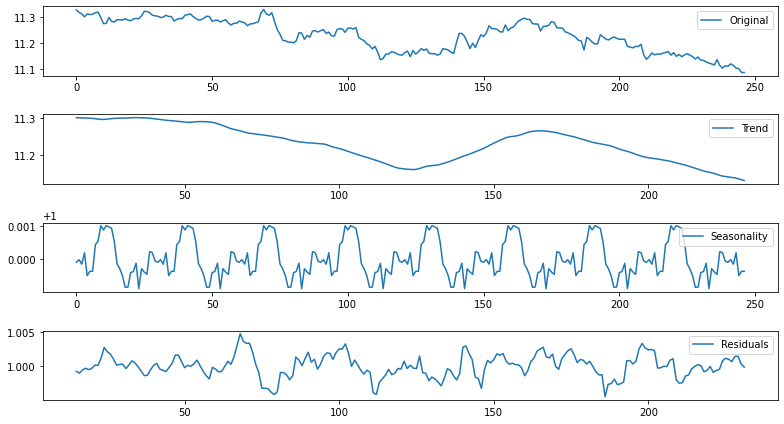

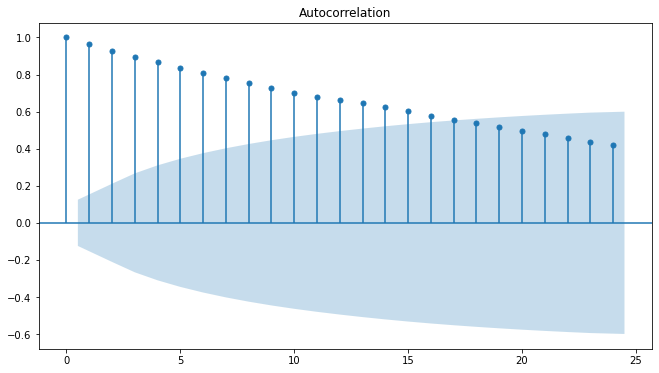

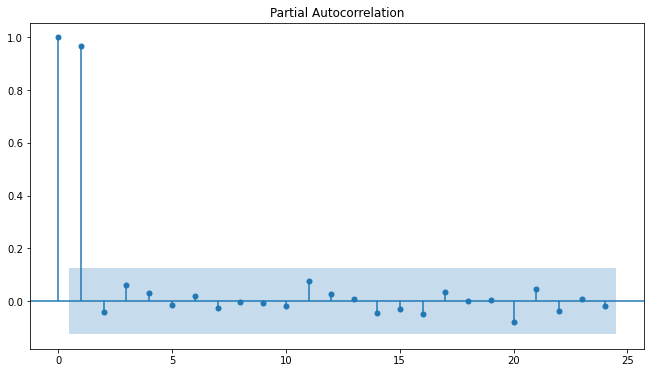

Results of Dickey-Fuller Test:
Test Statistic                -1.480474e+01
p-value                        2.073500e-27
#Lags Used                     0.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                -7.462708e+00
p-value                        5.302067e-11
#Lags Used                     1.300000e+01
Number of Observations Used    2.310000e+02
Critical Value (1%)           -3.458980e+00
Critical Value (5%)           -2.874135e+00
Critical Value (10%)          -2.573482e+00
dtype: float64
None
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  222
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 659.405
Date:                Wed, 04 May 2022   AIC  

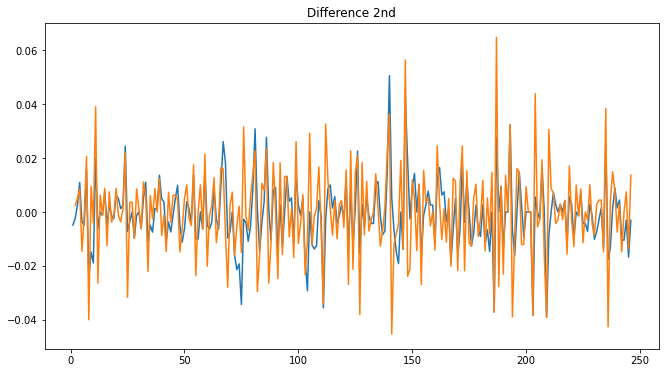

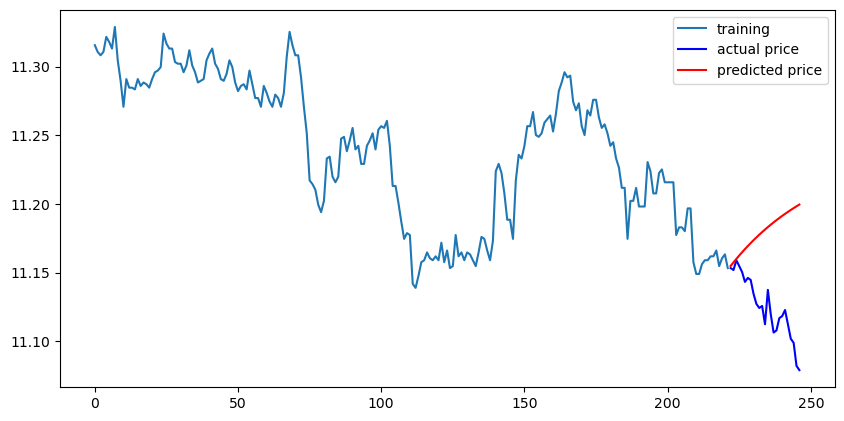

MSE:  20155038.542315986
MAE:  3800.7640073719854
RMSE:  4489.436327905318
MAPE: 5.68%


In [56]:
stockpredict(ts2,1,0,1)

# 7. 다른 주식 종목 예측해 보기

In [57]:
data_path2 = 'stock/035720.KS.csv'
df2 = pd.read_csv(data_path2) 
ts3 = df2['Open']
ts3

0      112500.0
1      113500.0
2      115000.0
3      115500.0
4      115500.0
         ...   
240     90400.0
241     89800.0
242     87600.0
243     89700.0
244     89300.0
Name: Open, Length: 245, dtype: float64

Results of Dickey-Fuller Test:
Test Statistic                  -0.696577
p-value                          0.847634
#Lags Used                       0.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


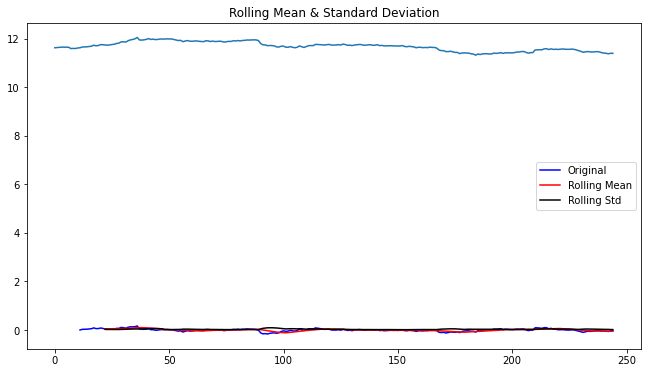

Results of Dickey-Fuller Test:
Test Statistic                  -3.447250
p-value                          0.009450
#Lags Used                       0.000000
Number of Observations Used    233.000000
Critical Value (1%)             -3.458731
Critical Value (5%)             -2.874026
Critical Value (10%)            -2.573424
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -4.378438
p-value                          0.000324
#Lags Used                       0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64


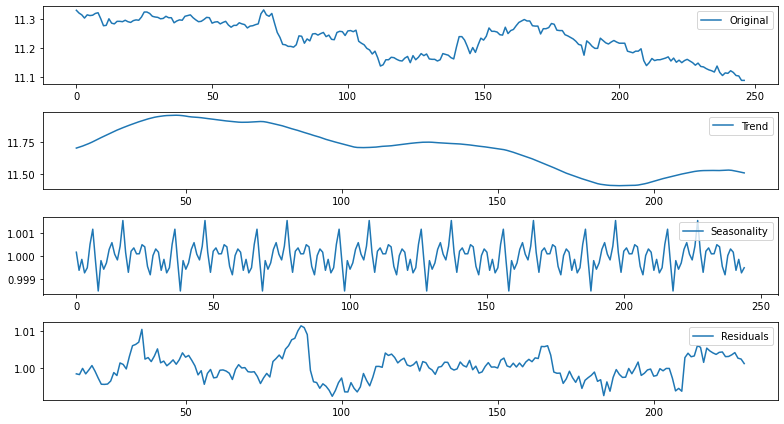

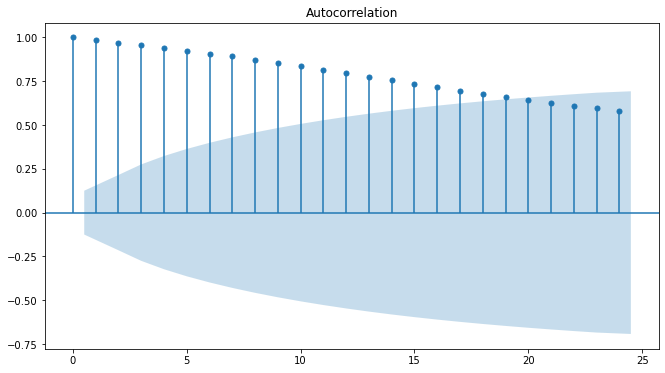

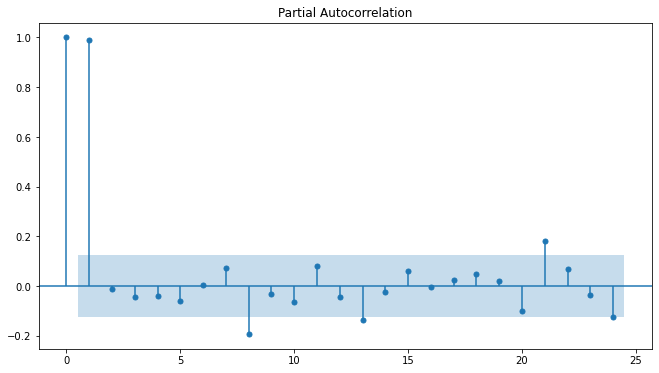

Results of Dickey-Fuller Test:
Test Statistic                  -4.422215
p-value                          0.000271
#Lags Used                       6.000000
Number of Observations Used    237.000000
Critical Value (1%)             -3.458247
Critical Value (5%)             -2.873814
Critical Value (10%)            -2.573311
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                -7.910061e+00
p-value                        3.970058e-12
#Lags Used                     1.000000e+01
Number of Observations Used    2.320000e+02
Critical Value (1%)           -3.458855e+00
Critical Value (5%)           -2.874080e+00
Critical Value (10%)          -2.573453e+00
dtype: float64
None
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  220
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 489.758
Date:                Wed, 04 May 2022   AIC                

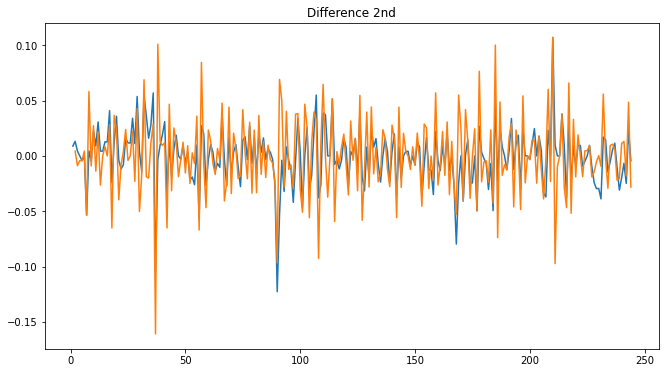

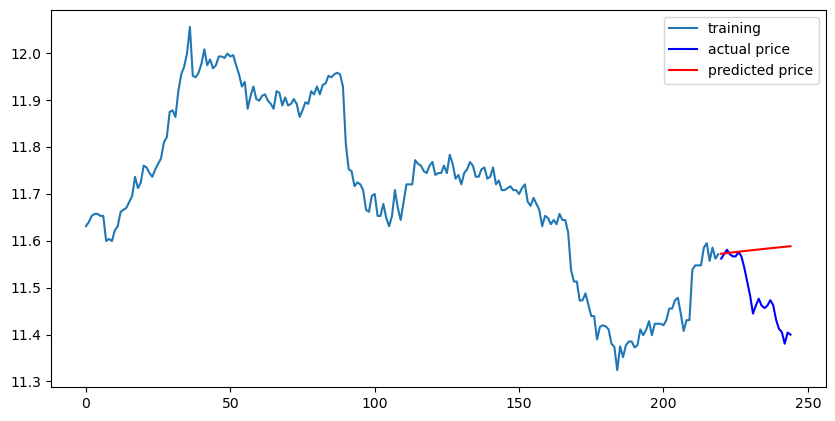

MSE:  130130621.63858195
MAE:  9173.600959077554
RMSE:  11407.480950612275
MAPE: 9.86%


In [58]:
stockpredict(ts3,1,0,2)

In [59]:
data_path3 = 'stock/035420.KS.csv'
df3 = pd.read_csv(data_path3) 
ts4 = df3['Open']

Results of Dickey-Fuller Test:
Test Statistic                  -0.231786
p-value                          0.934625
#Lags Used                       2.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


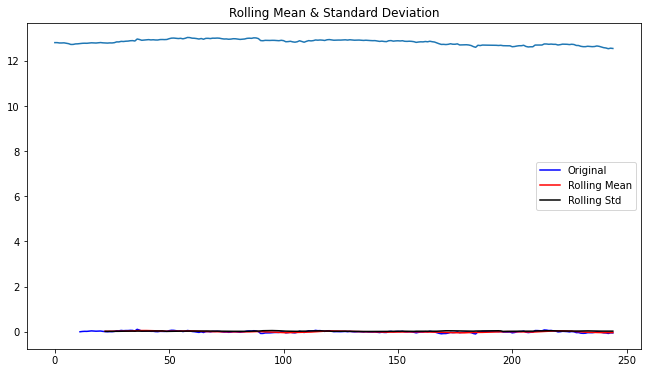

Results of Dickey-Fuller Test:
Test Statistic                  -4.497462
p-value                          0.000199
#Lags Used                       0.000000
Number of Observations Used    233.000000
Critical Value (1%)             -3.458731
Critical Value (5%)             -2.874026
Critical Value (10%)            -2.573424
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -5.909515e+00
p-value                        2.659286e-07
#Lags Used                     0.000000e+00
Number of Observations Used    2.140000e+02
Critical Value (1%)           -3.461282e+00
Critical Value (5%)           -2.875143e+00
Critical Value (10%)          -2.574020e+00
dtype: float64


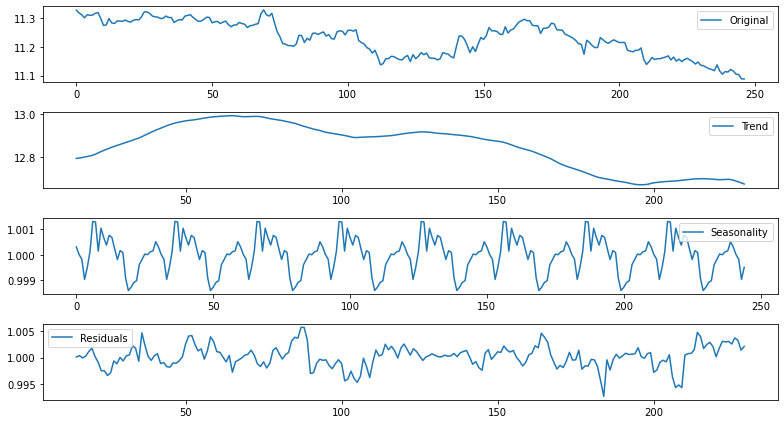

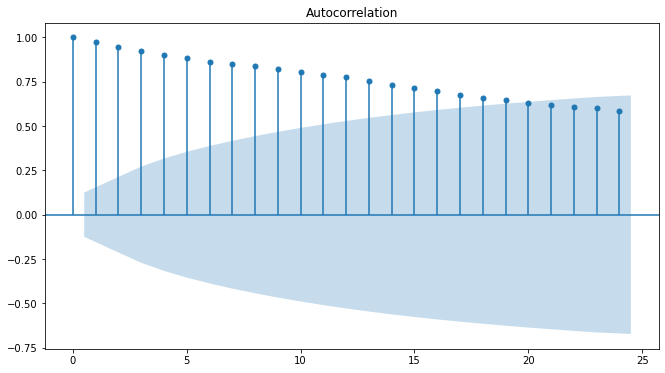

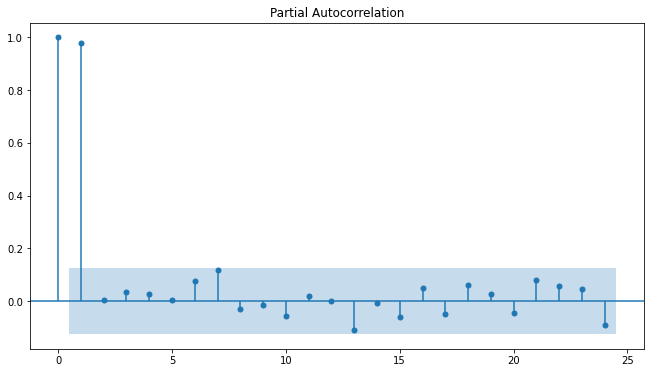

Results of Dickey-Fuller Test:
Test Statistic                -1.252608e+01
p-value                        2.487020e-23
#Lags Used                     1.000000e+00
Number of Observations Used    2.420000e+02
Critical Value (1%)           -3.457664e+00
Critical Value (5%)           -2.873559e+00
Critical Value (10%)          -2.573175e+00
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                -7.659691e+00
p-value                        1.701662e-11
#Lags Used                     1.400000e+01
Number of Observations Used    2.280000e+02
Critical Value (1%)           -3.459361e+00
Critical Value (5%)           -2.874302e+00
Critical Value (10%)          -2.573571e+00
dtype: float64
None
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  220
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 538.782
Date:                Wed, 04 May 2022   AIC  

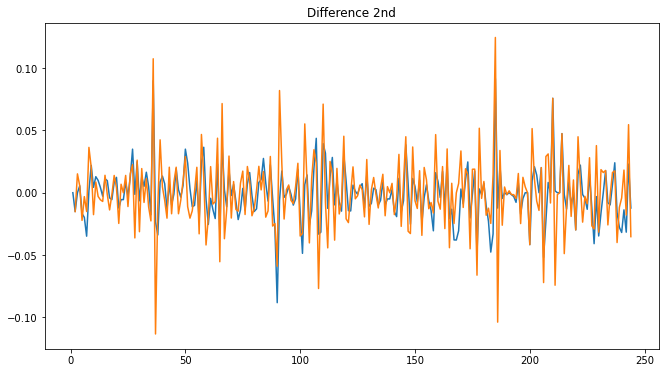

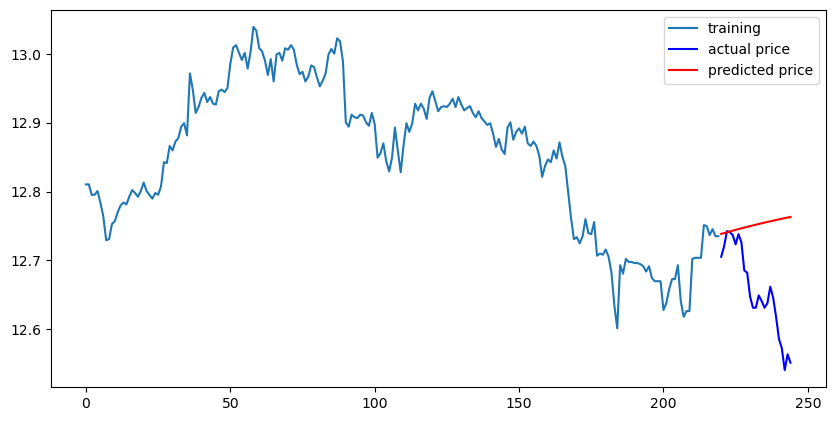

MSE:  1406855107.7473524
MAE:  30742.010995515157
RMSE:  37508.06723556084
MAPE: 10.24%


In [63]:
stockpredict(ts4,1,0,2)

In [65]:
def stockpredict2(sdf,p,q,d):
    #변환하기전 확인
    augmented_dickey_fuller_test(sdf)

    #로그변환
    sdf_log = np.log(sdf)
    plt.plot(sdf_log)

    #결측치, NaN 값 제거, 그래프, p-value값 확인
    smoving_avg = sdf_log.rolling(window=12).mean()  
    sdf_log_moving_avg = sdf_log - smoving_avg 
    sdf_log_moving_avg.dropna(inplace=True)
    plot_rolling_statistics(sdf_log_moving_avg)
    augmented_dickey_fuller_test(sdf_log_moving_avg)
    #시계열 안전성 분석
    decomposition = seasonal_decompose(sdf_log, model='multiplicative', period = 30) 

    trend = decomposition.trend 
    seasonal = decomposition.seasonal 
    residual = decomposition.resid 

    plt.rcParams["figure.figsize"] = (11,6)
    plt.subplot(411)
    plt.plot(ts_log, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    residual.dropna(inplace=True)
    augmented_dickey_fuller_test(residual)

   

    #적정 아리마 모수 찾기
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

    plot_acf(sdf_log)   
    plot_pacf(sdf_log)  
    plt.show()

    #1,2차 미분
    # 1차 차분 구하기
    diff_1 = sdf_log.diff(periods=1).iloc[1:]
    diff_1.plot(title='Difference 1st')
    print(augmented_dickey_fuller_test(diff_1))
    # 2차 차분 구하기
    diff_2 = diff_1.diff(periods=1).iloc[1:]
    diff_2.plot(title='Difference 2nd')
    print(augmented_dickey_fuller_test(diff_2))
    
     #학습 데이터 생성
    train_data, test_data = sdf_log[:int(len(residual)*0.9)], sdf_log[int(len(residual)*0.9):]

    model = ARIMA(train_data, order=(p, q, d))  
    fitted_m = model.fit() 
    print(fitted_m.summary())

    #결과 그래프 생성
    fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
    fc = np.array(fc)

    fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

    plt.figure(figsize=(10,5), dpi=100)
    plt.plot(train_data, label='training')
    plt.plot(test_data, c='b', label='actual price')
    plt.plot(fc_series, c='r',label='predicted price')
    plt.legend()
    plt.show()

    #mape 값
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import math

    mse = mean_squared_error(np.exp(test_data), np.exp(fc))
    print('MSE: ', mse)

    mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
    print('MAE: ', mae)

    rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
    print('RMSE: ', rmse)

    mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
    print('MAPE: {:.2f}%'.format(mape*100))
    

Results of Dickey-Fuller Test:
Test Statistic                  -1.058618
p-value                          0.731289
#Lags Used                       0.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


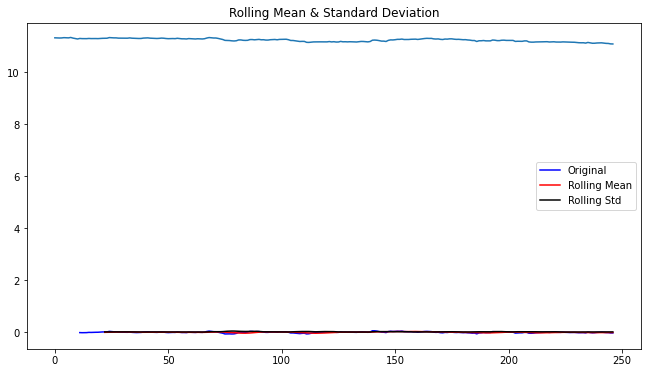

Results of Dickey-Fuller Test:
Test Statistic                  -4.808566
p-value                          0.000052
#Lags Used                       1.000000
Number of Observations Used    234.000000
Critical Value (1%)             -3.458608
Critical Value (5%)             -2.873972
Critical Value (10%)            -2.573396
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -5.557804
p-value                          0.000002
#Lags Used                       1.000000
Number of Observations Used    215.000000
Critical Value (1%)             -3.461136
Critical Value (5%)             -2.875079
Critical Value (10%)            -2.573986
dtype: float64


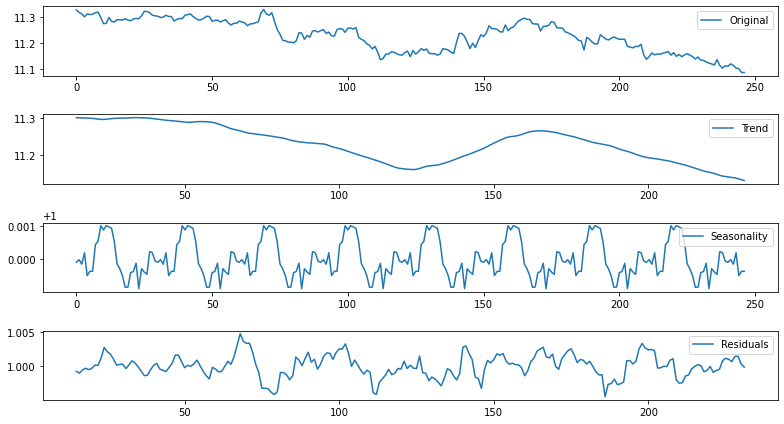

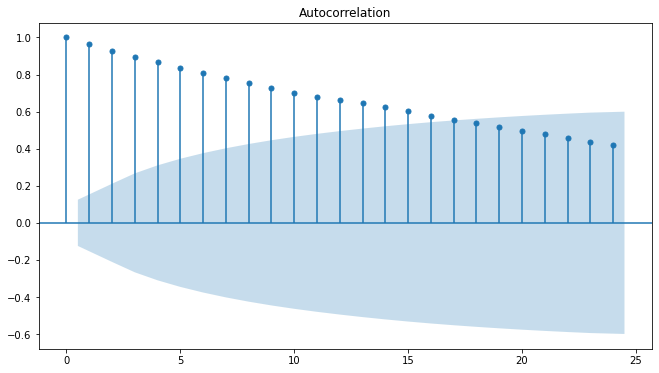

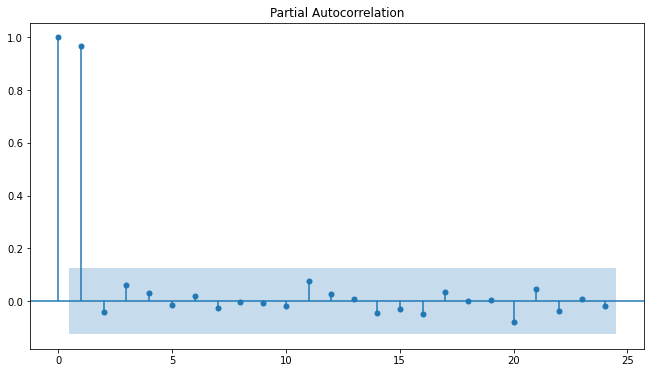

Results of Dickey-Fuller Test:
Test Statistic                -1.480474e+01
p-value                        2.073500e-27
#Lags Used                     0.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                -7.462708e+00
p-value                        5.302067e-11
#Lags Used                     1.300000e+01
Number of Observations Used    2.310000e+02
Critical Value (1%)           -3.458980e+00
Critical Value (5%)           -2.874135e+00
Critical Value (10%)          -2.573482e+00
dtype: float64
None
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  195
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 580.314
Date:                Wed, 04 May 2022   AIC  

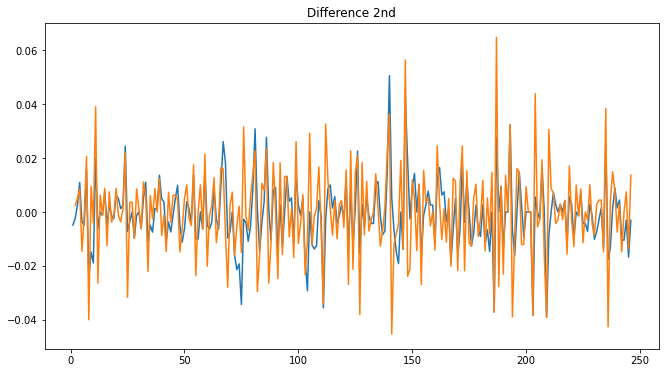

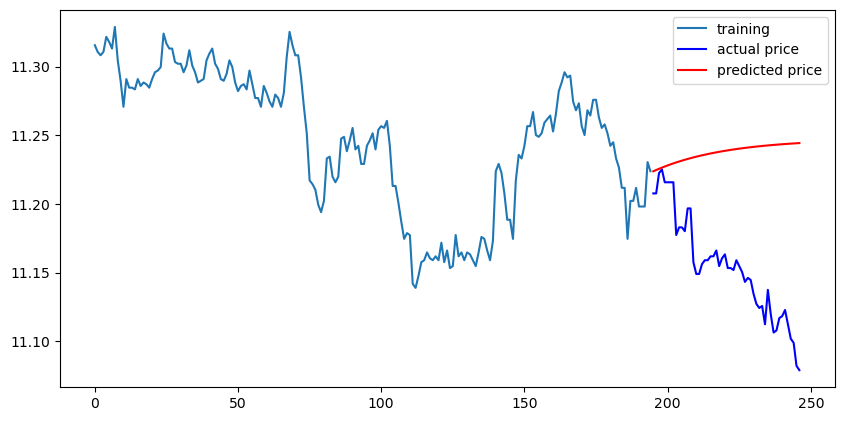

MSE:  44937191.64466528
MAE:  5994.375669170972
RMSE:  6703.520839429477
MAPE: 8.74%


In [72]:
stockpredict2(ts2,1,0,1)

Results of Dickey-Fuller Test:
Test Statistic                  -0.231786
p-value                          0.934625
#Lags Used                       2.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


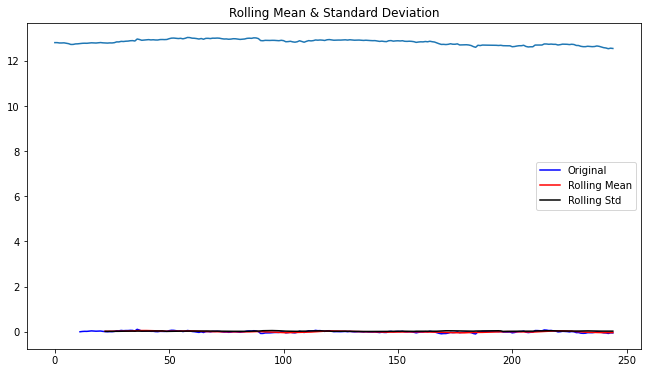

Results of Dickey-Fuller Test:
Test Statistic                  -4.497462
p-value                          0.000199
#Lags Used                       0.000000
Number of Observations Used    233.000000
Critical Value (1%)             -3.458731
Critical Value (5%)             -2.874026
Critical Value (10%)            -2.573424
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -5.909515e+00
p-value                        2.659286e-07
#Lags Used                     0.000000e+00
Number of Observations Used    2.140000e+02
Critical Value (1%)           -3.461282e+00
Critical Value (5%)           -2.875143e+00
Critical Value (10%)          -2.574020e+00
dtype: float64


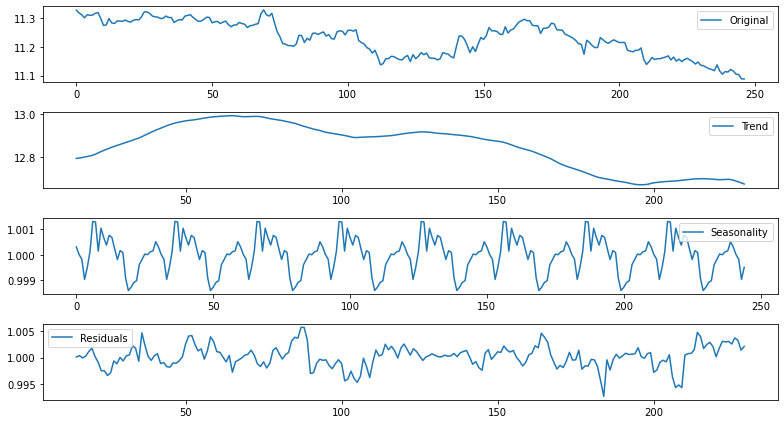

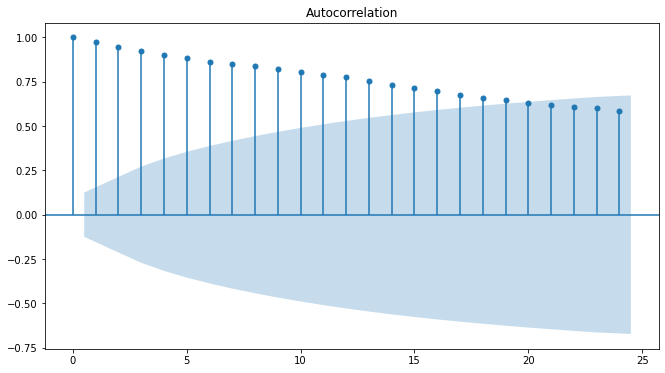

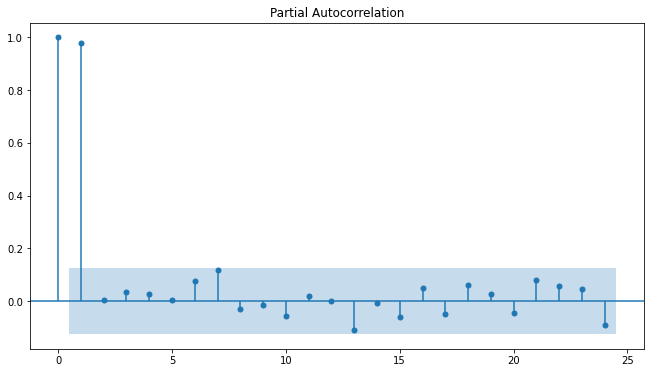

Results of Dickey-Fuller Test:
Test Statistic                -1.252608e+01
p-value                        2.487020e-23
#Lags Used                     1.000000e+00
Number of Observations Used    2.420000e+02
Critical Value (1%)           -3.457664e+00
Critical Value (5%)           -2.873559e+00
Critical Value (10%)          -2.573175e+00
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                -7.659691e+00
p-value                        1.701662e-11
#Lags Used                     1.400000e+01
Number of Observations Used    2.280000e+02
Critical Value (1%)           -3.459361e+00
Critical Value (5%)           -2.874302e+00
Critical Value (10%)          -2.573571e+00
dtype: float64
None
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  193
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 476.073
Date:                Wed, 04 May 2022   AIC  

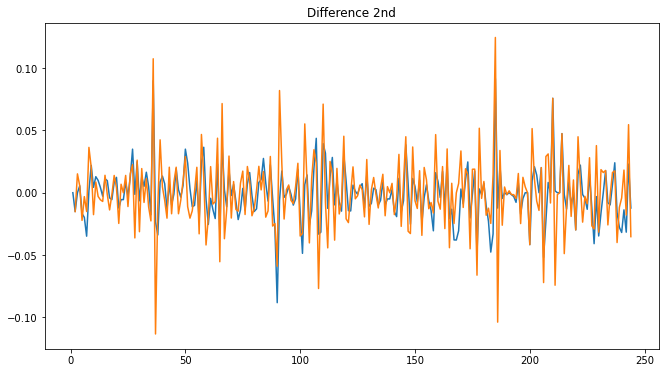

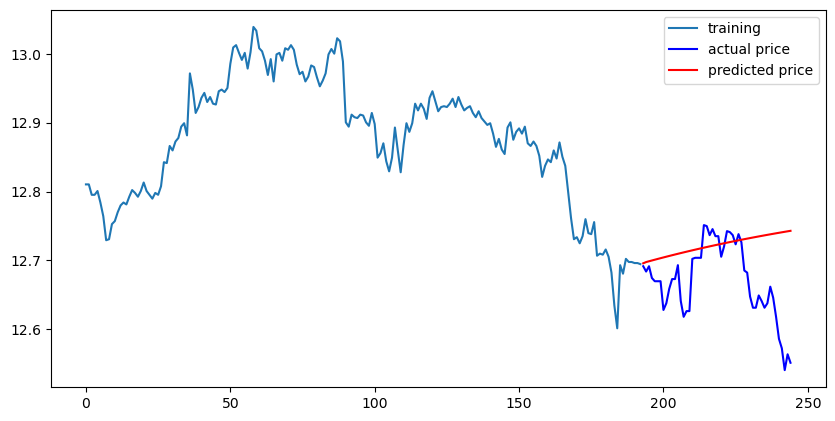

MSE:  606306908.7646191
MAE:  18357.905872216583
RMSE:  24623.30011928984
MAPE: 6.03%


In [66]:
stockpredict2(ts4,1,0,2)

Results of Dickey-Fuller Test:
Test Statistic                  -0.696577
p-value                          0.847634
#Lags Used                       0.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


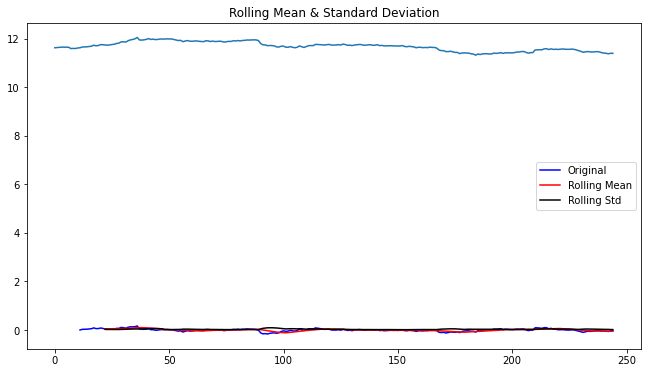

Results of Dickey-Fuller Test:
Test Statistic                  -3.447250
p-value                          0.009450
#Lags Used                       0.000000
Number of Observations Used    233.000000
Critical Value (1%)             -3.458731
Critical Value (5%)             -2.874026
Critical Value (10%)            -2.573424
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -4.378438
p-value                          0.000324
#Lags Used                       0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64


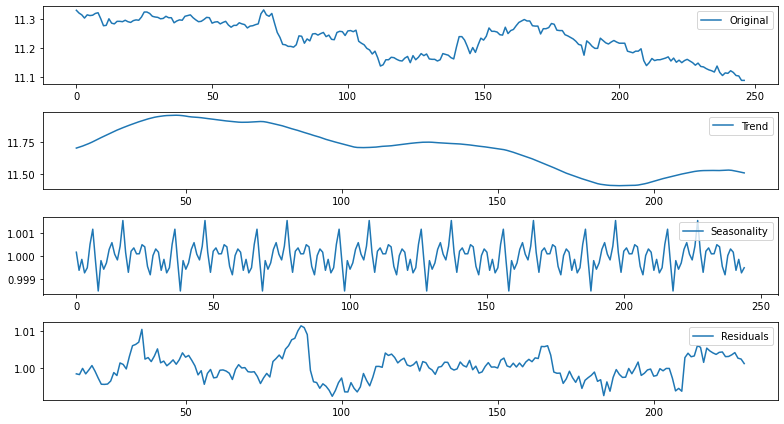

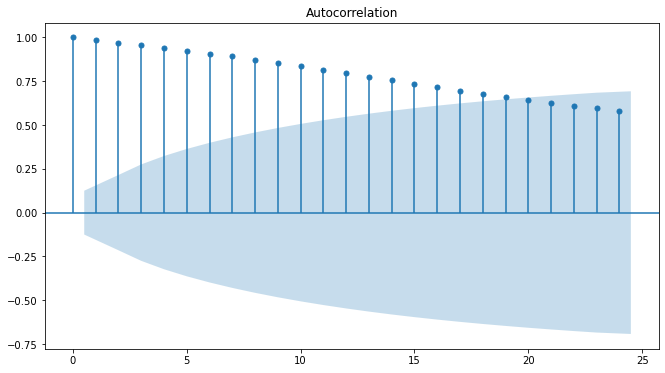

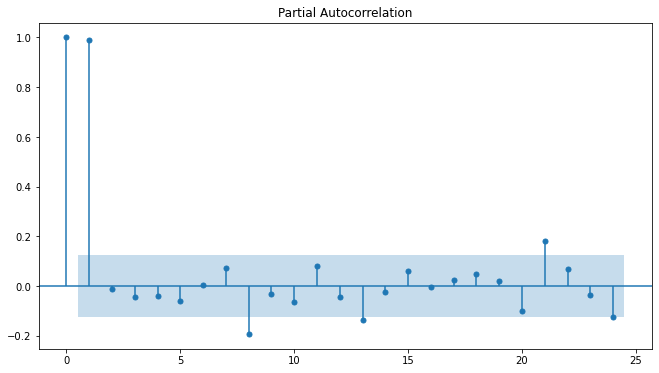

Results of Dickey-Fuller Test:
Test Statistic                  -4.422215
p-value                          0.000271
#Lags Used                       6.000000
Number of Observations Used    237.000000
Critical Value (1%)             -3.458247
Critical Value (5%)             -2.873814
Critical Value (10%)            -2.573311
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                -7.910061e+00
p-value                        3.970058e-12
#Lags Used                     1.000000e+01
Number of Observations Used    2.320000e+02
Critical Value (1%)           -3.458855e+00
Critical Value (5%)           -2.874080e+00
Critical Value (10%)          -2.573453e+00
dtype: float64
None
                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  193
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 431.367
Date:                Wed, 04 May 2022   AIC                

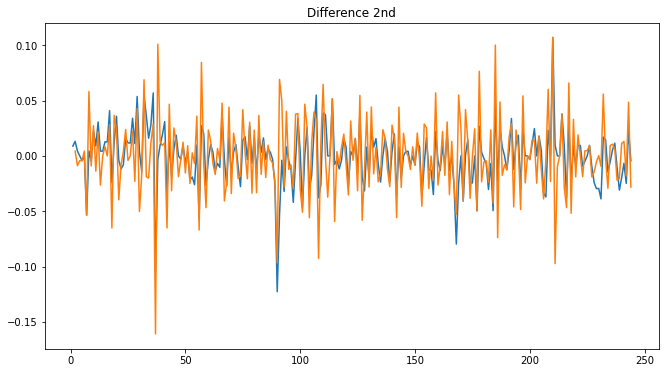

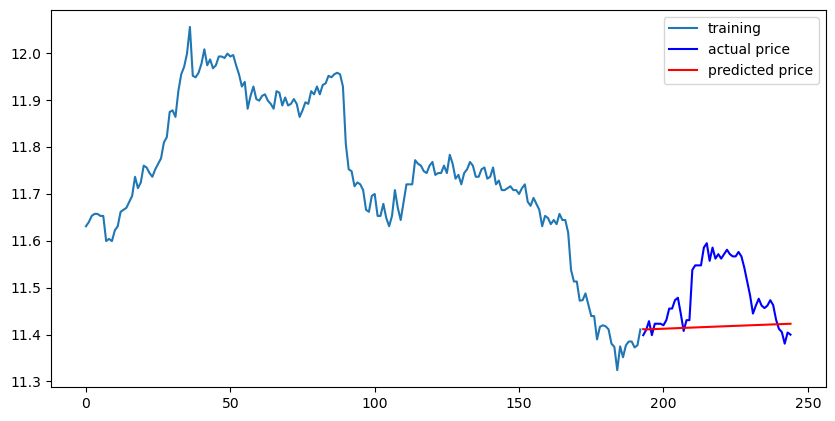

MSE:  85353974.80367985
MAE:  7069.8668232790715
RMSE:  9238.721491834238
MAPE: 6.90%


In [68]:
stockpredict2(ts3,1,0,2)

### 위 두함수는 하나는 데이터를 로그 데이터로, 또 하나는 시계열 분해를 통해 얻은 residual값으로 돌렸다.

# residual로 돌린 값이 로그 값보다 오차가 낮은 것도 있었지만 높은 것도 있었다.

### 결론 : 데이터를 로그나 시계열 분석을 해 둘 중 오류가 낮을 걸 선택해서 돌리면 된다는 점을 알게 되었습니다.